# markdown演示
# 一级（#后要空一格）
## 二级
[剩下的直接看原文](https://blog.csdn.net/TeFuirnever/article/details/104255022?spm=1001.2014.3001.5506)
*斜体* **粗体**
* 第一
* 第二
    * 第二.1

>引用
>>引用
~~删除线~~

### 折线图绘制:plt.plot(x,y)    x,y需是列表

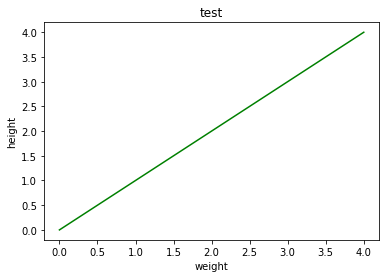

In [11]:
import matplotlib.pyplot as plt

x = list()
y = list()
for i in range(5):
    x.append(i)
    y.append(i)
plt.plot(x, y, "g", label="test")
plt.title("test")
plt.xlabel("weight")
plt.ylabel("height")
plt.show()

#### 同一张图画两根线

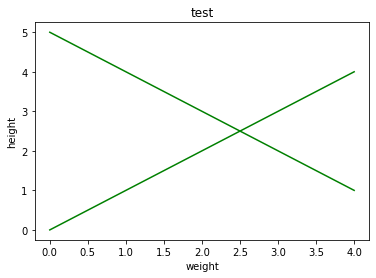

In [12]:
import matplotlib.pyplot as plt

x = list()
y = list()
z = list()
for i in range(5):
    x.append(i)
    y.append(i)
    z.append(5 - i)
plt.plot(x, y, "g", label="test")
plt.plot(x, z, "g", label="test")
plt.title("test")
plt.xlabel("weight")
plt.ylabel("height")
plt.show()
#   plt.plot(x, z, "g", label="test")
#   plt.show()  分开show就是画成两张图

### python类与引用

In [13]:
class Cat:
    def __init__(self, name):  #构造函数,self指向实例本身的引用(必须有该参数)
        print(name)


a = Cat("maomao")


maomao


##### 创建类的成员

In [18]:
class Geese:
    """大雁类"""
    wing = "翅膀，比较大"  #类的属性
    claw = "爪，行走自如"

    def __init__(self):
        self.beak = "喙，比较尖"  #实例中定义类的属性：self.属性名
        print(self.beak)  #实例中访问类的属性：self.属性名
        print(self.wing)
        print(self.claw)


goose = Geese()  # 创建对象
goose.wing = "很大"  # 修改类的对象
print(goose.wing)

喙，比较尖
翅膀，比较大
爪，行走自如
很大


In [ ]:
import numpy as np

np.arrary([(1, 2, 3), (4, 5, 6)])  # numpy创建二维数组


### tensor和numpy的转化

##### tensor转numpy

In [12]:
import torch

a = torch.ones(6)
b = a.numpy()
print(a)
print(b)


tensor([1., 1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1. 1.]


##### numpy转tensor

In [14]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
print(a)
print(b)

[1. 1. 1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)


### 评估函数 F1

In [9]:
import numpy as np


def f1_loss(premask, groundtruth):  # 传入两个numpy,比对两个数组的1和0的不同
    seg_inv, gt_inv = np.logical_not(premask), np.logical_not(groundtruth)
    true_pos = float(np.logical_and(premask, groundtruth).sum())  # float for division
    false_pos = np.logical_and(premask, gt_inv).sum()
    false_neg = np.logical_and(seg_inv, groundtruth).sum()
    f1 = 2 * true_pos / (2 * true_pos + false_pos + false_neg + 1e-6)
    return f1


a = np.array([[0, 1, 1], [1, 1, 1], [1, 1, 1]])  #
b = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])  #
c = f1_loss(a, b)
print(c)

0.9411764152249167


In [2]:
import torch
import torchvision.models as models
import torch.nn.functional as F

input_data = torch.randn(1, 3, 256, 256)


def resnet_cifar(net, input_data):
    x = net.conv1(input_data)
    x = net.bn1(x)
    x = F.relu(x)
    x = net.layer1(x)
    x = net.layer2(x)
    x = net.layer3(x)
    x = net.layer4[0].conv1(x)  #这样就提取了layer4第一块的第一个卷积层的输出
    x = x.view(x.shape[0], -1)
    return x


model = models.resnet18()
mm = resnet_cifar(model, input_data)



In [ ]:
def get_features(input, net, end=''):
    x = input
    x1, x2, x3, x4 = None, None, None, None
    for index, layer in net.named_modules():
        if index == 'down':
            x = layer(x)
            x1 = x
        if index == 'down1':
            x = layer(x)
            x2 = x
        if index == 'down2':
            x = layer(x)
            x3 = x
        if index == 'down3':
            x = layer(x)
            x4 = x
        if index == 'down4':
            x = layer(x)
        if index == 'up1':
            x = layer(x, x4)
        if index == 'up2':
            x = layer(x, x3)
        if index == 'up3':
            x = layer(x, x2)
        if index == 'up4':
            x = layer(x, x1)
        if index == 'out':
            x = layer(x)
        if index == end:
            # save_feature_to_img(x, index, '')
            return x


### 升维，降维（以后补）

#### extend()

In [3]:

a = [1, 2, 3]
b = [4, 5]
a.append(b)
print(a)

[1, 2, 3, [4, 5]]


In [7]:
# extend:将b拆开加到a的末尾
a = [1, 2, 3]
b = [4, 5]
a.extend(b)
print(a)

[1, 2, 3, 4, 5]


#### item()函数———items() 函数以列表返回可遍历的(键, 值) 元组。————将字典中的键值对以元组存储，并将众多元组存在列表中。


In [4]:
favorite_places = {'A': '1', 'B': '2', 'C': '3'}
print(favorite_places.items())
for key, value in favorite_places.items():
    print(key, value)

dict_items([('A', '1'), ('B', '2'), ('C', '3')])
A 1
B 2
C 3


### os.path.join() 从第一个绝对路径（开头是“/”的）开始拼接，再之前的路径舍弃掉

In [11]:
import os

path = r'/E/'

aaa = os.path.join(path, "anan/app")  #注意：要在第一个路径最后加一个“/”，否则输出/E\./anan/app,拼接不成功
print(aaa)

/E/anan/app


In [ ]:
#绝对路径：文件在硬盘上存储的真正路径     <硬盘符>\<目录1>\<目录2>…\<文件名>    C:\cat1\cat2\test.txt
#相对路径：从当前文件位置出发，指向目标文件的路径   ./<目录1>/<目录2>…/<文件名>    ./cat1/cat2/test.txt
#访问上一级路径：../        ../../root.html

In [ ]:
#   image/1.jpg     相对路径(当前目录下的文件)
#   /image/1.jpg    绝对路径(根目录下的文件)
#   ./image/1.jpg   相对路径
#   ../image/1.jpg  上一级

In [1]:
a = '/1/2/3'
a.lstrip('/')
print(a)

/1/2/3


In [1]:
path = '/data/dataset-verse20training/rawdata/'
print(path.lstrip('/'))



data/dataset-verse20training/rawdata/


In [3]:
a = 'data/dataset-verse20training/rawdata'
b = a.replace('/', '\\')
print(b)

data\dataset-verse20training\rawdata


#  json 格式详解

##### dict -> json  用json.dump() 将obj转化为json字符串

In [ ]:
import json

sample = {'one': 1, 'two': 2, 'three': 3}
jsondata = json.dumps(sample)  # 将obj序列化为JSON格式的str。
print(jsondata)

# re库详解

In [35]:
import re

text = "你说得对，但是，原。所以说？"
str = re.sub(r"[a-zA-Z0-9\,]", '', text)
print(str)

你说得对但是原所以说


In [34]:
import re

text = "你说得对，但是，原。所以说？"
str = re.sub(r'，', '', text)
print(str)

你说得对但是原。所以说？


In [32]:
import re

text = "你说得对，但是，原。所以说？"
print(re.sub(r'[，。]', '', text))


你说得对但是原所以说？


In [23]:
import re

line = 'dogs are smarter than cats'
sentence = 'bob and food or rooot'
ret = re.match(r'(.*) are (.*)', line)
if ret:
    print(ret.group())  # 返回none代表不匹配，如果匹配则返回一个类，用.group()可以输出类
ret_1 = re.search(r'o{1}', line)  # 匹配1个o
print(ret_1.group())

print()
print(re.search(r'o{1}', sentence).group())
print(re.search(r'o{2}', sentence).group())
print(re.search(r'o{2,}', sentence).group())


dogs are smarter than cats
o

o
oo
oo


In [21]:
import re

line = '1254-1455-555 # 外国号码'
ret_1 = re.sub(r'#(.*)', '', line)
print(ret_1)  # 不再返回group()，返回的是切后的字符串
ret_2 = re.sub(r'[^0-9]', '', line)
print(ret_2)
ret_3 = re.sub(r'[0-9],-]', '', line)  # ??如何去除多种字符
print(ret_3)

1254-1455-555 
12541455555
1254-1455-555 # 外国号码


In [26]:
import re

line = '123 abc 123 123 aaa 1 11 29 3 好好好 ,.\n'
#
# print(re.sub(r'[a-z1-9_]','*',line))    #匹配字母数字下划线
#
# print(re.sub(r'[^a-z]','*',line))
#
# print(re.sub(r'.','*',line))        # 相当于[^\n\r],匹配换行符以外的任意字符
#
# print(re.sub(r'[^\S]','*',line))    #\s为匹配空格
#
# print(re.sub(r'(123*)','*',line))   # 可以匹配*前的表达式一次或多次
#
# print(re.sub(r'123','*',line))      # 匹配字符串‘123’
#
# print(re.sub(r'[123]','*',line))    # 匹配字符1或2或3

print(re.sub(r'1{2}', '*', line))  #限制两个1(11) 的时候匹配

print(re.sub(r'[0-9]{1,2}', '*', line))  # 匹配0~99,即0~9的数字两个同时出现在一起

print(re.sub(r'1(23){0,1}', '*', line))
print(re.sub(r'1(23)?', '*', line))
print(re.sub(r'1', '*', line))
print(re.sub(r'1{0,1}', '*', line))

123 abc 123 123 aaa 1 * 29 3 好好好 ,.

** abc ** ** aaa * * * * 好好好 ,.

* abc * * aaa * ** 29 3 好好好 ,.

* abc * * aaa * ** 29 3 好好好 ,.

*23 abc *23 *23 aaa * ** 29 3 好好好 ,.

**2*3* *a*b*c* **2*3* **2*3* *a*a*a* ** *** *2*9* *3* *好*好*好* *,*.*
*


# 匹配数字

In [60]:
import re

line = '0  1  22 555  39'

print(re.sub(r'o', '*', sentence))  #一次匹配一个
print(re.sub(r'o{1,}', '*', sentence))  #一次匹配多个 {0,}即一次匹配0个，匹配不上时移动一格算匹配一次。

print(re.sub(r'8989', '*', sentence))

print(re.sub(r'\s[1-9][0-9]\s{0,1}', '*', line))  # 匹配0~99 不过需要首末都为空格，否则如123就会先匹配12后匹配3.
print(re.sub(r'\s[1-9]{0,1}[0-9]{0,1}\s', '*', line))

z z* z** z*** a ab abc
z z* z* z* a ab abc
z zo zoo zooo a ab abc
0  1 *555 *
0*1*22 555*39


# 匹配前缀，以z开头的所有字符串
## 限定符{}限定出现次数，？={0，1}，*={0，}，+={1，}

In [65]:
import re

line = 'z zo zoo zooo a ab abc'
print(re.sub(r'z(o){0,}', '*', line))  # (o){0,}表示让o这个字符串出现0~n次
print(re.sub(r'z(o){1,}|z', '*', line))  # 用了|来表达或

* * * * a ab abc
* * * * a ab abc


# 处理文件路径，将//改为\

In [73]:
import re

line = 'E\\DATA\\IMPORT/DOWNLODE/MARKDOWN'
print(re.sub(r'(\\){1,}', '/', line))  #注意\字符需要转意义

E/DATA/IMPORT/DOWNLODE/MARKDOWN


# 匹配括号里的内容
### 注意这里的匹配为贪婪机制，即是匹配包裹最大的括号。

In [132]:
import re

line = '()(123 12 abc) 111 23 45 (145 2 ll)'
sentence = '<11<111> haha hh <222 11 n>'
print(re.sub('\(.*\)', '*', line))  # 贪婪，将整个外面的括号一起匹配进来

print(re.sub('\(.*?\)', '*', line))  # .意为匹配除了换行符外的所有字符,.{1,}意为匹配任意字一次以上

print(re.sub('<.*?>', '*', sentence))  # ?表示


*
** 111 23 45 *
* haha hh *


# 匹配email

In [161]:
import re

mail = '1234 2608224156@qq.com abcd'
print(re.sub('[0-9a-zA-Z]{1,}@[0-9a-zA-Z]{1,}\.[0-9a-zA-Z]{1,}', '*', mail))
print(re.sub('[\w]{1,}@[\w]{1,}\.[\w]{1,}', '*', mail))

1234 * abcd
1234 * abcd


# dataframe 的保存_____df.to_csv()______没有路径则会自动创建

In [78]:
import pandas as pd

data = {'Site': ['Google', 'Runoob', 'Wiki'], 'Age': [10, 12, 13]}
df = pd.DataFrame(data, index=["No.1", "No.2", "No.3"])
print(df)

df.to_csv('data/preprocess/preprocess_1.csv', index=True, header=True)

        Site  Age
No.1  Google   10
No.2  Runoob   12
No.3    Wiki   13


## lambda函数的使用_____配合dataframe做表的处理（用df.apply()来遍历）

In [35]:
func = lambda x: x + 1 if x == 1 else 0
print(func(1))
print(func(2))

import pandas as pd

data = {'Site': ['aa', 'bb', 'cc', 'dd'], 'p': [0.85, 0.92, 0.52, 0.23]}
df_1 = pd.DataFrame(data)
print(df)
print("\n")
df_2 = df_1['p'].apply(lambda x: '{:.0%}'.format(x))
print(df_2)


2
0
  Site     p
0   aa  0.85
1   bb  0.92
2   cc  0.52
3   dd  0.23


0    85%
1    92%
2    52%
3    23%
Name: p, dtype: object


# os.path操作____按顺序创建文件夹

In [61]:
num = len(os.listdir('data/preprocess'))
print(num)
if not os.path.exists('data/preprocess/preprocess_{}'.format(num)):
    os.makedirs('data/preprocess/preprocess_{}'.format(num))

28


# numpy高维数组切片

In [19]:
import numpy as np

arr = np.array([[[1, 2, 3, 5], [1, 2, 3, 6]], [[1, 2, 3, 5], [1, 7, 8, 9]], [[2, 4, 5, 6], [6, 7, 8, 9]]])
print(arr)
print()
print(arr.shape)
#
# # 高维切片操作
# print()
# print(arr[1:2,1:2,1:2])             # 表示对每一维度都取索引1到索引2的元素
# print(arr[1:2,1:2,1:2].shape)
#
#
# print()
# print(arr[1,:,:])
# print(arr[1,:,:].shape)         # 截取第一个维度
#
#
# print()
# print(arr[1,:,:])
# print(arr[:,:,1].shape)     # 截取第三个维度

for i in range(arr.shape[0]):
    print(arr[i, :, :])

[[[1 2 3 5]
  [1 2 3 6]]

 [[1 2 3 5]
  [1 7 8 9]]

 [[2 4 5 6]
  [6 7 8 9]]]

(3, 2, 4)
[[1 2 3 5]
 [1 2 3 6]]
[[1 2 3 5]
 [1 7 8 9]]
[[2 4 5 6]
 [6 7 8 9]]


### 像[::2]这种的

In [242]:
import numpy as np

arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
print(arr[::3])  #最后的数字代表跳跃的步长

[1 4 7]


# 遍历二维数组

In [20]:
import numpy as np
arr = np.zeros((3, 255, 255))  # (C,H,W)
for i in range(arr.shape[0]):
    print(arr[i, :, :])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# numpy reshape函数
### 不改变值只改变形状
## reshape(-1,1)  转化成一列
## reshape(1,-1)  转化成一行
## reshape(2,-1)  转化成两行

In [22]:
import numpy as np

a = np.arange(8)
print ('原始数组：')
print (a)
print ('\n')

b = a.reshape(-1,2)
print ('修改后的数组：')
print (b)
print(b.shape)

原始数组：
[0 1 2 3 4 5 6 7]


修改后的数组：
[[0 1]
 [2 3]
 [4 5]
 [6 7]]
(4, 2)


# numpy transpose函数
### 对换数组的维度
### np.transpose(arr,[2,1,0])  第二个参数为一个列表

In [26]:
import numpy as np

a = np.arange(24).reshape(2,3,4)

print ('原数组：')
print (a)
print ('\n')

print ('对换数组：')
print (np.transpose(a,[1,0,2]))

原数组：
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


对换数组：
[[[ 0  1  2  3]
  [12 13 14 15]]

 [[ 4  5  6  7]
  [16 17 18 19]]

 [[ 8  9 10 11]
  [20 21 22 23]]]


#  numpy squeeze函数
### 从数组的形状中删除一维条目

In [34]:
import numpy as np
a = np.arange(2).reshape(1,1,2)
print(a)
print(a.shape)
b = np.squeeze(a)
print(b)

[[[0 1]]]
(1, 1, 2)
[0 1]


# tensor_flatten操作

In [40]:
import torch
a = torch.tensor([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print(a.shape)
b = torch.flatten(a,1)
print(b)

torch.Size([3, 4])
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])


In [44]:
import torch
a = torch.tensor([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print(a.shape)
b = torch.flatten(a,1)
print(b)

torch.Size([3, 4])
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])


# jieba和停用词的使用

In [2]:
import jieba

line = '我真的要回家了'
aaa = jieba.cut(line)  # 返回的是一个可迭代对象要用join->str或是list()
sentence = list(jieba.cut(line))
print(' '.join(aaa))
print(sentence)

stopwords = list()
with open('data/stopwords/哈工大停用词表.txt', encoding='utf-8') as f:  # 之前一直读不下来，结果是忘了加utf-8
    for word in f.read().split('\n'):
        stopwords.append(word)

for word in sentence:
    if word in stopwords:
        sentence.remove(word)
print(sentence)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.592 seconds.
Prefix dict has been built successfully.


我 真的 要 回家 了
['我', '真的', '要', '回家', '了']
['真的', '回家']


# BOW使用_____生成句向量列表，不过是以词频为基础，区别于onehot

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

X_test = ['you are good', 'you are also better', 'but we do not fit']
vectorizer = CountVectorizer()
count = vectorizer.fit_transform(X_test)

print('count:{}'.format(count))
print('\ncount.toarray()')
#  生成词向量列表，不过是以词频为基础，区别于onehot


print('\nvectorizer.get_feature_names()')
print(vectorizer.get_feature_names())

print('\nvectorizer.vocabulary_')
print(vectorizer.vocabulary_)




count:  (0, 9)	1
  (0, 1)	1
  (0, 6)	1
  (1, 9)	1
  (1, 1)	1
  (1, 0)	1
  (1, 2)	1
  (2, 3)	1
  (2, 8)	1
  (2, 4)	1
  (2, 7)	1
  (2, 5)	1

count.toarray()

vectorizer.get_feature_names()
['also', 'are', 'better', 'but', 'do', 'fit', 'good', 'not', 'we', 'you']

vectorizer.vocabulary_
{'you': 9, 'are': 1, 'good': 6, 'also': 0, 'better': 2, 'but': 3, 'we': 8, 'do': 4, 'not': 7, 'fit': 5}


# TF-IDF__关键词抽取

In [1]:
from jieba import analyse

TF_IDF = analyse.extract_tags

sentence = '线程是程序执行时的最小单位，它是进程的一个执行流，是 CPU 调度和分派的基本单位，一个进程可以由很多个线程组成，''线程间共享进程的所有资源，每个线程有自己的堆栈和局部变量。''线程由 CPU 独立调度执行，在多 CPU 环境下就允许多个线程同时运行。''同样多线程也可以实现并发操作，每个请求分配一个线程来处理。'
print()
aaa = TF_IDF(sentence, withWeight=True)
print(aaa)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache


Loading model cost 0.545 seconds.
Prefix dict has been built successfully.


[('线程', 1.6092956253903845), ('CPU', 0.6896981251673077), ('进程', 0.3764666465751923), ('调度', 0.32615933279615383), ('多线程', 0.2673207240769231), ('程序执行', 0.2539909706038462), ('每个', 0.22361383583346153), ('执行', 0.21377215274192307), ('堆栈', 0.212835852075), ('局部变量', 0.20620430426153843), ('单位', 0.20618249898423077), ('并发', 0.17934551295134618), ('分派', 0.1757404560996154), ('一个', 0.1625510176228846), ('共享', 0.15951683818615384), ('请求', 0.1368286539801923), ('最小', 0.1366125756480769), ('可以', 0.13481227892923078), ('允许', 0.12333661457230768), ('分配', 0.12104404350384615)]


In [8]:
import numpy as np

aaa = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
print(aaa)
print(aaa[:, 0] + aaa[:, 0])

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]
[ 2  6 10 14 18]


## class__属性引用:obj.name

In [1]:
class Myclass:
    i = 12345

    def f(self):
        return 'hello'


# 实例化类
x = Myclass()

# 访问类的属性
print(x.i)
# 访问类的方法
print(x.f())

12345
hello


## 构造函数__init__()方法
### self为类的一个实例而不是类，类的方法规定类必须多一个参数且该参数为self放在第一个
### 类的私有属性__row 类外无法直接访问

In [3]:
class Complex:
    __row = 0

    def __init__(self, r, i, row):
        self.r = r
        self.i = i


x = Complex(1, 2, 3)
print('{} + {}i'.format(x.r, x.i))

1 + 2i


# 继承
### 子类会继承父类的属性和方法
### super().XXX___调用父类(超类)的一个方法

In [9]:
class people:
    name = ''
    age = 0
    __weight = 0

    def __init__(self, n, a, w):
        self.name = n
        self.age = a

    def showing(self):
        print('name:{},age:{}'.format(self.name, self.age))

    def show_age(self):
        print(self.age)


class student(people):
    grade = ''

    def __init__(self, n, a, w, g):
        super(people, self).__init__(n, a, w)  # super(后父类函数内不用再写self)
        # people.__init__(self, n, a, w)      # 调用父类的构造函数(于super()等价)
        self.grade = g

    def showing(self):
        people.showing(self)  # 调用父类的方法
        print('grade:{}'.format(self.grade))

    # 覆盖了父类的方法(直接写一个同名函数)
    def show_age(self):
        self.age = self.age - 5
        print(self.age)
haha = student('haha', 21, 66, 'undergraduate')
haha.showing()
haha.show_age()

name:haha,age:21
grade:undergraduate
21


# 类的可迭代方法__getitem__()  可以像list()一样,直接用[]获取元素

In [35]:
class fib:
    def __getitem__(self, idx):
        a = 0
        b = 1
        for i in range(idx):
            a, b = b, a + b
        return a

aa = fib()
print(aa[5])

5


# matplotlib_解析
### 在matplotlib中，整个图像为一个Figure对象。在Figure对象中可以包含一个或者多个Axes对象。每个Axes(ax)对象都是一个拥有自己坐标系统的绘图区域。


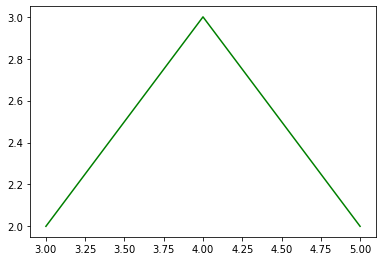

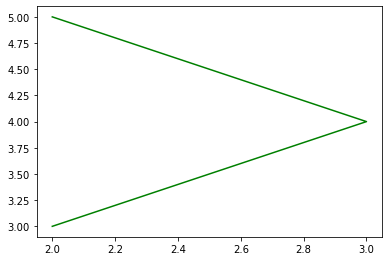

In [11]:
import matplotlib.pyplot as plt

fig_1 = plt.figure()
fig_2 = plt.figure()

axes_1 = fig_1.add_axes([0.1,0.1,0.8,0.8])
axes_2 = fig_2.add_axes([0.1,0.1,0.8,0.8])

x=[3,4,5] # [列表]
y=[2,3,2] # x,y元素个数N应相同
axes_1.plot(x,y,'g')
axes_2.plot(y,x,'g')
plt.show()

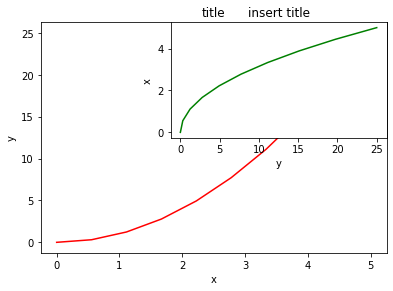

In [22]:
import matplotlib.pyplot as plt
from pylab import *
x = linspace(0, 5, 10)
y = x ** 2

fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1) 前两个参数表示在figure中的位置
axes2 = fig.add_axes([0.4, 0.5, 0.5, 0.4]) # inset axes

axes.plot(x, y, 'r')#参数3 为设置颜色

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title')
fig.savefig('result/loss/aaa.png', dpi = 600)  # obj.savefig()来保存
plt.show()


In [36]:
import numpy as np
aaa = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,212,13,14,15],[16,17,18,19,20]])
bbb = list()
for i in range(aaa.shape[0]):
    bbb.append(aaa[i])

for idx,slice in enumerate(bbb) :
    print(bbb[idx])

[1 2 3 4 5]
[ 6  7  8  9 10]
[ 11 212  13  14  15]
[16 17 18 19 20]


### to.device解析

# 指定设备在GPU上运行
device=torch.device("cuda")
# 指定模型在设备上运行
model=model.to(device)
# 将GPU保存的模型加载到GPU上
device = torch.device("cuda")
model = TheModelClass(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.to(device)
## 输入模型的数据也要todevice

# 魔术方法__init__(),__len__(),__getitem__()
### 写的很好

In [2]:
class Fun:
    def __init__(self, x_list):
        """ initialize the class instance
        Args:
            x_list: data with list type
        Returns:
            None
        """
        if not isinstance(x_list, list):
            raise ValueError("input x_list is not a list type")
        self.data = x_list
        print("intialize success")

    def __getitem__(self, idx):
        print("__getitem__ is called")
        return self.data[idx]

    def __len__(self):
        print("__len__ is called")
        return len(self.data)

fun = Fun(x_list=[1, 2, 3, 4, 5])
print(fun[2])
print(len(fun))

intialize success
__getitem__ is called
3
__len__ is called
5


# 光标变粗:键盘锁住情况按0

In [8]:
import struct
import numpy as np

def load_mnist_train():
    labels_path = 'data/minist/train_mask/train-labels.idx1-ubyte'
    images_path = 'data/minist/train_img/train-images.idx3-ubyte'
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII', imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
    return images, labels

def load_mnist_test():
    labels_path = 'data/minist/test_mask/t10k-labels.idx1-ubyte'
    images_path = 'data/minist/test_img/t10k-images.idx3-ubyte'
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII', imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
    return images, labels
img_list,img_label = load_mnist_train()
img = list()
for i in range(30):
    img.append(img_list[i].reshape(-1,1,28,28))


# tensor 转为int

In [52]:
import torch
import numpy as np
# int -> tensor -> int
a = torch.tensor(1)
b = a.item()

# list -> tensor(cpu)
l0 = [1, 2, 3]
t = torch.tensor(l0)

# tensor(cpu) -> numpy -> list
a = t.numpy()
l1 = t.numpy().tolist()

# list -> numpy
a0 = np.array(l0)

# numpy -> tensor(cpu)
t1 = torch.from_numpy(a0)

# tensor(cpu) -> tensor(cuda)
tc = t1.cuda()

# tensor(cuda) -> list
l2 = tc.cpu().numpy().tolist()


# loss传入的两个参数为模型的输出和mask(mask直接是从迭代器哪里拿过来的就是tensor形式)
### 注意，两个参数都应该是tensor形式

In [55]:
import torch as th
import torch.nn as nn

loss=nn.L1Loss()

input=th.Tensor([2,3,4,5])
target=th.Tensor([4,5,6,7])
output=loss(input,target)

print(output)

tensor(2.)


# 读取模型的参数

In [1]:
import torch
path = 'result/models/minist/Epoch10_LS-0.001_DC-0.991.pth'
state_dict = torch.load(path)
for key, value in state_dict.items():  # k 参数名 v 对应参数值
        print('{}\t\t{}\n{}'.format(key,value.shape,value))
        print()
        print()

conv_1.convd.0.weight		torch.Size([6, 1, 5, 5])
tensor([[[[-0.2481, -0.0332, -0.3431, -0.1593, -0.3915],
          [ 0.1108, -0.4005, -0.0953, -0.0032, -0.2730],
          [ 0.0562, -0.0828,  0.3113,  0.1086,  0.0264],
          [-0.0654,  0.1561,  0.0761,  0.3300,  0.0277],
          [-0.1290,  0.2236,  0.0758,  0.2436,  0.3570]]],


        [[[-0.0588,  0.1376,  0.1706,  0.0592,  0.1360],
          [ 0.0737,  0.2444,  0.3327,  0.1649, -0.1933],
          [ 0.3316, -0.0233, -0.1175, -0.1409,  0.1517],
          [-0.1665, -0.3806, -0.3218, -0.1175,  0.0209],
          [-0.3628, -0.5527, -0.1690, -0.2243, -0.2233]]],


        [[[-0.1503, -0.0076, -0.3549, -0.1672, -0.0999],
          [-0.1419, -0.1865, -0.6848, -0.5396,  0.0873],
          [-0.2966, -0.2443, -0.1970, -0.1341,  0.1972],
          [-0.0731, -0.1437, -0.1032,  0.0681,  0.0927],
          [ 0.1738,  0.0914,  0.1735,  0.2274,  0.2454]]],


        [[[ 0.1590, -0.2542,  0.0400, -0.0051, -0.1506],
          [ 0.2289,  0.3572,

# 测试模型时
### model.train()启用Dropout层和batch normalization层
### model.eval()关闭Dropout层和batch normalization层
### torch.no_grad()来关闭梯度的计算

In [ ]:
# evaluate model:
model.eval()

with torch.no_grad():
    ...
    out_data = model(data)
    ...

# to.device()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
img = img.to(device)

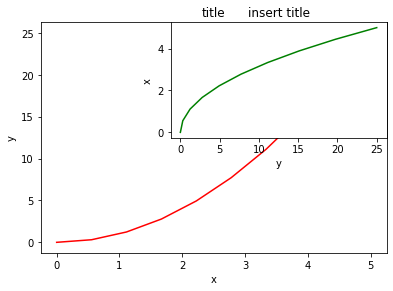